# Assignment 13 – Preprocessing Data for scikit-learn
## By Saul Alas Garcia and Ranju Thomas

**Let's import the libraries**

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

**Let us read from the raw file found in the mushroom dataset.** <br>
**From the .names file we get the column names. We are selecting the edible/poisonous type, odor VeilType, Color, population and Habitat. **<br>
**We need to get the column number also from the .names so we can just add those columns to the data frame.**

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                  sep = ',', 
                  header = None, 
                  usecols = [0,5,16,17,21, 22], 
                  names = ["Type", "Odor", "VielType", "VielColor", "Population","Habitat"])
df.head(5)

,Type,Odor,VielType,VielColor,Population,Habitat
0,p,p,p,w,s,u
1,e,a,p,w,n,g
2,e,l,p,w,n,m
3,p,p,p,w,s,u
4,e,n,p,w,a,g


**Now we need to assign numbers for the data in the dataset as thats the way we can analyze in scikit-learn requires that values be stored as numerics.**

In [3]:
# Converting alphabet values to numeric. The alphabet denotations as copied from the website's .names file
#Type (As mentiones in classes e means its edible and p is for poisonious)
df.replace(to_replace={"Type":{'e':0, 'p':1}}, inplace=True)
# Odor (almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s)
df.replace(to_replace={"Odor":{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)
# Viel Type (partial=p,universal=u)
df.replace(to_replace={"VielType":{'p':0, 'u':1}},inplace=True)
#Viel Color (brown=n,orange=o,white=w,yellow=y)
df.replace(to_replace={"VielColor":{'n':0, 'o':1, 'w':2, 'y':3}},inplace=True)
#Population (abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y)
df.replace(to_replace={"Population":{'a':0, 'c':1, 'n':2, 's':3, 'v':4, 'y':5}},inplace=True) 
#Habitat (grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d)
df.replace(to_replace={"Habitat":{'g':0, 'l':1, 'm':2, 'p':3, 'u':4, 'w':5, 'd':6}},inplace=True) 
df.head(5)

,Type,Odor,VielType,VielColor,Population,Habitat
0,1,7,0,2,3,4
1,0,0,0,2,2,0
2,0,1,0,2,2,2
3,1,7,0,2,3,4
4,0,6,0,2,0,0


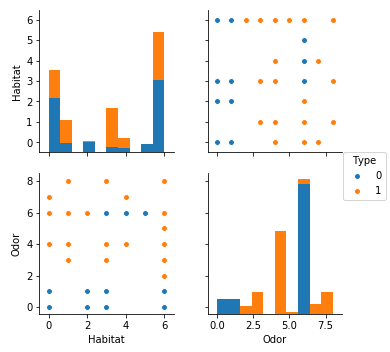

In [4]:
analysis = sns.pairplot(df, vars=["Habitat", "Odor"], hue="Type")

**From the 3rd plot its evident that the almond=a,anise=l (0 and 1 respectively) are edible (e=0) and their habitat is scattered accros grasses(0), meadow(2), paths(3) & woods(6).**

Now lets compare aginst habitat and edibility.Now let's assign it the X and Y axis and go forward

Text(0,0.5,'Muschroom Type')

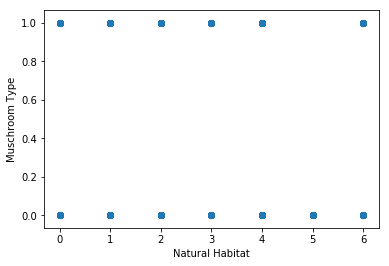

In [6]:
x = df.Habitat
y = df.Type
# scatter plot time!
plt.scatter(x, y)
plt.xlabel("Natural Habitat")
plt.ylabel("Muschroom Type")

**This proves that the Habitat 5 which is found in waste (w=5) is edible (type e=0). Interesting**

**All right. Lets do the odor and edibility chart too.**

Text(0,0.5,'Edibility of Mushroom')

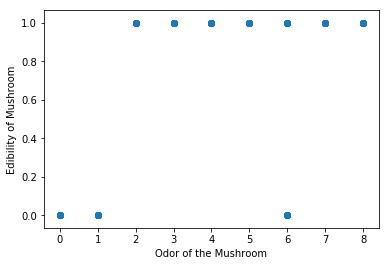

In [9]:
x = df.Odor
y = df.Type
plt.scatter(x, y)
plt.xlabel("Odor of the Mushroom")
plt.ylabel("Edibility of Mushroom")

**This is particular because the odor none(=6) is both edible and poisonous.**